In [1]:
#importing libraries

import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Specify 'ISO-8859-1' encoding
df_movie = pd.read_csv('imbd_rating.csv', encoding='ISO-8859-1')


In [3]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df_movie.shape

(15509, 10)

In [5]:
df_movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# data filtering and preprocessing

In [7]:
attribute= df_movie.columns
attribute

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
df_movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
unique_genres= df_movie['Genre'].unique()
print("unique Genres:", unique_genres)

unique Genres: ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family,

In [10]:
rating_dist= df_movie['Rating'].value_counts()
print ("Rating Distribution:\n", rating_dist)

Rating Distribution:
 6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [11]:
df_movie.drop_duplicates(inplace = True)

In [12]:
attributes = ['Name', 'Year', 'Duration', 'Genre', 'Rating']
df_movie.dropna(subset = attributes, inplace =  True)
missing_val = df_movie.isna().sum()
print(missing_val)
#deleting all the4 missing values

Name          0
Year          0
Duration      0
Genre         0
Rating        0
Votes         0
Director      1
Actor 1      74
Actor 2     115
Actor 3     161
dtype: int64


In [13]:
df_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [14]:
movie_name_rating= df_movie[['Name', 'Rating']]
print(movie_name_rating)

#displays the column name and rating

                                     Name  Rating
1      #Gadhvi (He thought he was Gandhi)     7.0
3                                 #Yaaram     4.4
5                    ...Aur Pyaar Ho Gaya     4.7
6                               ...Yahaan     7.4
8                      ?: A Question Mark     5.6
...                                   ...     ...
15493                              Zubaan     6.1
15494                            Zubeidaa     6.2
15503                     Zulm Ki Zanjeer     5.8
15505                               Zulmi     4.5
15508                        Zulm-O-Sitam     6.2

[5820 rows x 2 columns]


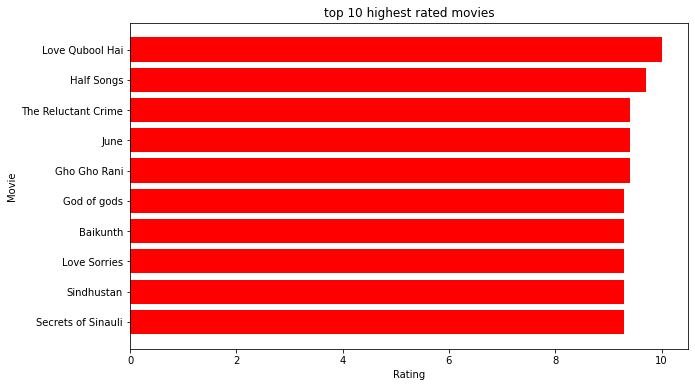

In [15]:
top_rated_movies= df_movie.sort_values(by ='Rating', ascending = False).head(10)
plt.figure(figsize = (10,6))
plt.barh(top_rated_movies['Name'], top_rated_movies['Rating'], color = 'red')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('top 10 highest rated movies')
plt.gca().invert_yaxis()
plt.show()

#showing top 10 movies rating

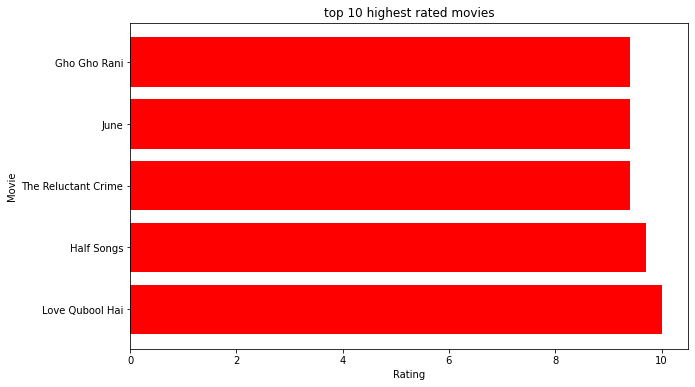

In [16]:
top_rated_movies= df_movie.sort_values(by ='Rating', ascending = False).head()
plt.figure(figsize = (10,6))
plt.barh(top_rated_movies['Name'], top_rated_movies['Rating'], color = 'red')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('top 10 highest rated movies')

plt.show()

#showing top 5 movies 

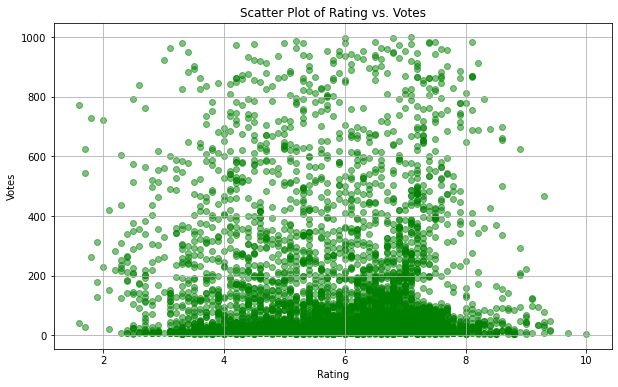

In [17]:


# Convert the 'Votes' column to numeric, coercing any non-numeric values to NaN
df_movie['Votes'] = pd.to_numeric(df_movie['Votes'], errors='coerce')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_movie['Rating'], df_movie['Votes'], alpha=0.5, color='g')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs. Votes')
plt.grid(True)
plt.show()


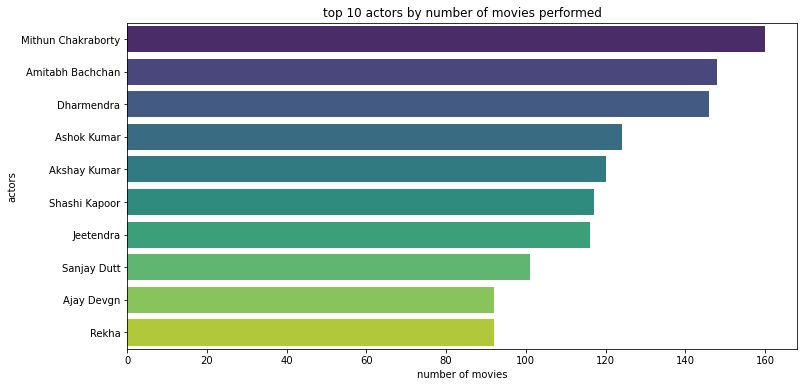

In [18]:
actors = pd.concat([df_movie['Actor 1'],df_movie['Actor 2'], df_movie['Actor 3']])
actor_counts= actors.value_counts().reset_index()
actor_counts.columns= ['Actor', 'Number of Movies']
plt.figure(figsize = (12, 6))
sns.barplot(x= 'Number of Movies', y= 'Actor', data= actor_counts.head(10), palette= 'viridis')
plt.xlabel('number of movies')
plt.ylabel('actors')
plt.title('top 10 actors by number of movies performed')
plt.show()

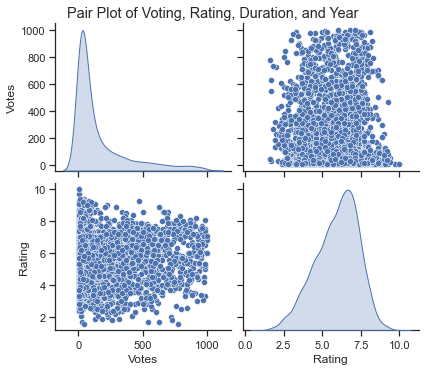

In [19]:


# Define the columns of interest
columns_of_interest = ['Votes', 'Rating', 'Duration', 'Year']

# Set the style and create the pair plot
sns.set(style='ticks')
pairplot = sns.pairplot(df_movie[columns_of_interest], diag_kind='kde', markers='o', palette='viridis', height=2.5, aspect=1.2)

# Add a title
pairplot.fig.suptitle('Pair Plot of Voting, Rating, Duration, and Year', y=1.02)

# Show the plot
plt.show()


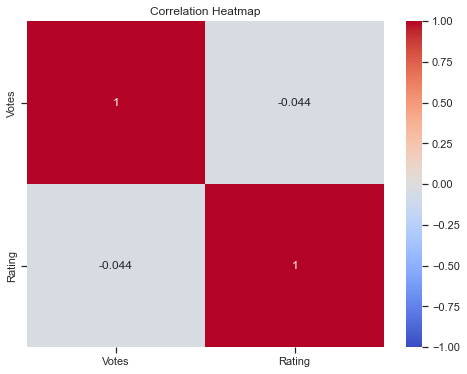

In [20]:
numerical_columns= ['Votes', 'Rating', 'Duration', 'Year']
correlation_matrix= df_movie[numerical_columns].corr()
plt.figure(figsize= (8,6))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', vmin= -1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# feature engineering

In [21]:
df_movie_sorted= df_movie.sort_values(by='Votes', ascending = False)
df_movie_sorted['Vote_Count_Percentile'] =df_movie_sorted['Votes'].rank(pct= True)*100
df_movie_sorted.reset_index(drop=True, inplace=True)
print(df_movie_sorted[['Name', 'Votes', 'Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977533
2                              Kurukshetra  996.0              99.955066
3                              Dishkiyaoon  986.0              99.932599
4                               Kadvi Hawa  985.0              99.898899
...                                    ...    ...                    ...
5815                                 Ziddi    NaN                    NaN
5816                        Zila Ghaziabad    NaN                    NaN
5817                                 Zinda    NaN                    NaN
5818              Zindagi Na Milegi Dobara    NaN                    NaN
5819                              Zubeidaa    NaN                    NaN

[5820 rows x 3 columns]


In [22]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [23]:
#removing all the null values
df_movie= df_movie.dropna(subset=['Votes'])
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# Model Training and Testing

In [29]:
df_movie['Year'] = df_movie['Year'].astype(str)
df_movie['Duration']=df_movie['Duration'].astype(str)
df_movie['Year']= df_movie['Year'].str.extract('(\d+').astype(float)
df_movie['Duration'] = df_movie['Duration'].str.extract('(\d+)').astype(float)
X= df_movie[['Year', 'Duration', 'Votes']]
y = df_movie['Rating']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)



model= LinearRegression()
model.fit(X_train, y_train)

y_pref = model.predict(X_test)





error: missing ), unterminated subpattern at position 0

# Prediction in Visiualization for better Understanding

In [42]:
y_test = np.random.rand(100) * 10 #ctual rating
y_pred = np.random.rand(100) *  10 #prection rating
error = y_test * y_pred
fig.axs = plt.subplots(3, 1, figsize = (8,12))

axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel('Actual Ratings')
axs[0].set_ylabel('Prediction Ratings')
axs[0].set_title("Actual vs. prediction ratings")
                 
                 #line plot
 movie_samples = np.arange(1, len(y_pred) + 1)
axs[1].plot(movie_samples, y_arange(1, len(y_pred, marker = 'o', linestyle = '-')
axs[1].set_xlabel("Movie samples")
axs[1].set_ylabel("Predicted ratings")
axs[1].set_title("Predicted Ratings across movies sample")
axs[1].tick_params(axis= 'x', rotation= 45)
     
                                    
                                    #histogram
                                    
axs[2].hist(errors, bins  = 30)
axs[2].set_xlabel("prediction error")
axs[2].set_ylabel("frequency")
axs[2].set_title("distribution of prediction errors")
axs[2].axvline(x = 0, color = 'b', linestyle = '--')
plt.tight_layout()
plt.show()                                   

                  

IndentationError: unexpected indent (2572325920.py, line 12)